In [8]:
import ee
import geemap.core as geemap
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# ee.Authenticate()


Successfully saved authorization token.


In [9]:
try:
    # Initialize the library.
    ee.Initialize()
    print('Google Earth Engine has initialized successfully!')
except ee.EEException as e:
    print('Google Earth Engine has failed to initialize!')
except:
    print("Unexpected error:", sys.exc_info()[0])
    raise

Google Earth Engine has initialized successfully!


In [ ]:
# boekeloCords = {
#   "type": "Polygon",
#   "coordinates": [
#     [
#       [6.707668, 52.184142],
#       [6.707668, 52.232951],
#       [6.833324, 52.232951],
#       [6.833324, 52.184142],
#       [6.707668, 52.184142]
#     ]
#   ]
# }


# dataset = ee.ImageCollection(
#   'LANDSAT/LC08/C02/T1_L2'
#   ).filterDate(
#     '2021-03-01', '2021-04-01'
#     ).filterMetadata(
#       'CLOUD_COVER', 'less_than', 10
#       ).filterBounds(
#         boekeloCords
#         )


In [82]:
# # Applies scaling factors.
# def apply_scale_factors(image):
#   optical_bands = image.select('SR_B.').multiply(0.0000275).add(-0.2)
#   thermal_bands = image.select('ST_B.*').multiply(0.00341802).add(149.0)
#   return image.addBands(optical_bands, None, True).addBands(
#       thermal_bands, None, True
#   )

# mediam_dataset = dataset.median()
# scale_median_dataset = apply_scale_factors(mediam_dataset)

# visualization = {
#     'bands': ['SR_B4', 'SR_B3', 'SR_B2'],
#     'min': 0.0,
#     'max': 0.3,
# }

# m = geemap.Map()
# m.set_center(6.770496, 52.208473, 13)
# m.add_layer(scale_median_dataset, visualization, 'True Color (432)')
# m

Map(center=[52.208473, 6.770496], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=Searc…

In [88]:
bandOfInterest1 = 'B4'
bandOfInterest2 = 'B3'
bandOfInterest3 = 'B2'
chosenBands = [bandOfInterest1, bandOfInterest2, bandOfInterest3]

img = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_038029_20180810').select([bandOfInterest1, bandOfInterest2, bandOfInterest3])

aoi = ee.Geometry.Polygon(
    [[[-110.8, 44.7], [-110.8, 44.6], [-110.6, 44.6], [-110.6, 44.7]]], None, False
)
# aoi2 = ee.Geometry.Polygon(
#     [[[6.7, 52.2],
#   [6.7, 52.1],
#   [6.6, 52.1],
#   [6.6, 52.2]]], None, False
# )

In [89]:
rgb_img = geemap.ee_to_numpy(img, region=aoi)
print(rgb_img.shape)

(373, 531, 3)


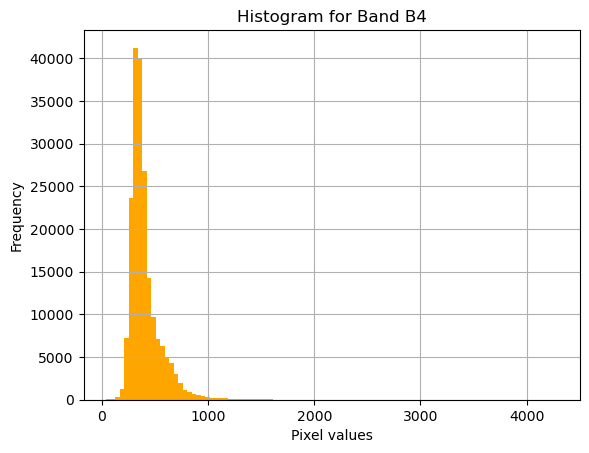

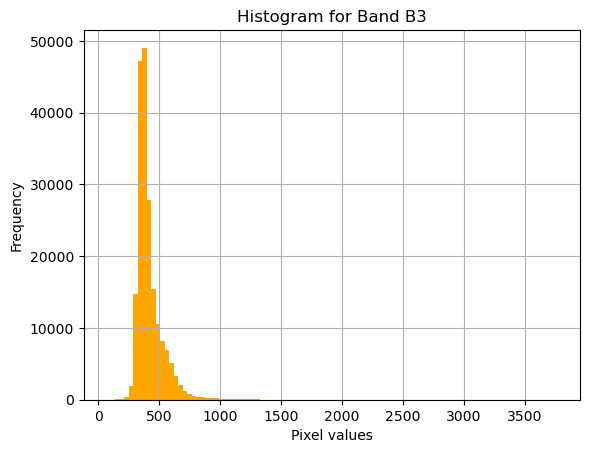

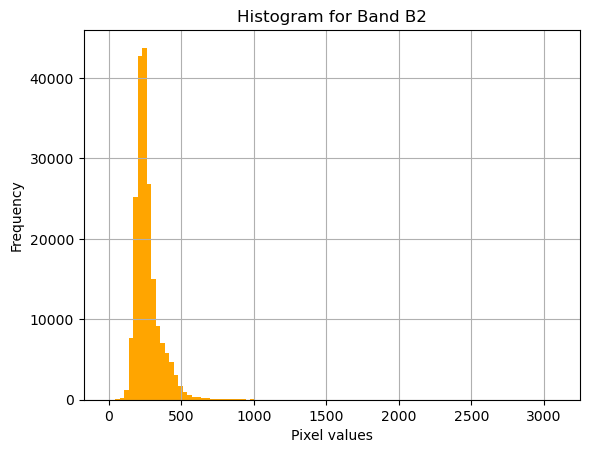

In [90]:
# NumPy array with shape (height, width, bands)
for i in range(rgb_img.shape[2]):  # Iterate over the third dimension (bands)
    plt.figure()
    plt.hist(rgb_img[:, :, i].flatten(), bins=100, color='orange')  # Flatten the i-th band data
    plt.title(f'Histogram for Band {chosenBands[i]}')  # Bands are typically indexed starting from 1
    plt.xlabel('Pixel values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


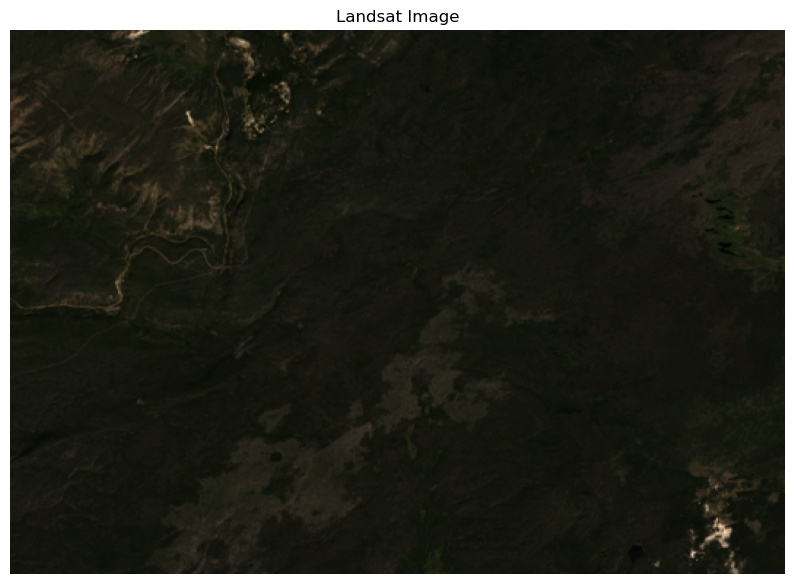

In [91]:
import matplotlib.pyplot as plt

# Check if the data needs to be normalized
max_value = rgb_img.max()
if max_value > 1:
    rgb_img = rgb_img / max_value  # Normalize to range [0, 1] if necessary

# Plotting the image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_img)
plt.axis('off')  # Turn off axis numbers and labels
plt.title('Landsat Image')
plt.show()
